In [1]:
pip install pandas seaborn matplotlib sklearn shap

Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo2020/avx512, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx512, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo2020/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo2020/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic
Processing /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx2/pandas-2.1.0+computecanada-cp39-cp39-linux_x86_64.whl
Processing /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic/seaborn-0.13.2+computecanada-py3-none-any.whl
Processing /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx2/matplotlib-3.7.2+computecanada-cp39-cp39-linux_x86_64.whl
Processing /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic/sklearn-0.0+computecanada-py2.py3-none

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import shap


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
import pandas as pd
data = pd.read_csv('/home/user100/scratch/data/all.csv')

data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,label
0,-1.45,-1.30,-2.27,-1.28,-1.44,-2.27,-1.84,-2.24,-1.84,-1.44,...,-1.84,-1.30,-1.30,-1.44,-1.28,-1.28,-1.44,-1.30,-1.45,1
1,-1.28,-2.24,-1.30,-0.88,-1.28,-1.45,-1.00,-1.45,-1.28,-1.28,...,-1.30,-1.84,-1.30,-1.45,-1.28,-1.44,-1.84,-1.30,-0.88,1
2,-1.45,-1.45,-1.28,-0.58,-1.45,-1.45,-1.30,-1.44,-1.00,-0.58,...,-1.00,-1.44,-1.30,-1.30,-1.84,-1.30,-1.00,-0.88,-1.00,1
3,-0.88,-0.58,-0.88,-1.44,-1.84,-2.27,-1.84,-1.45,-1.45,-2.24,...,-2.27,-1.84,-1.45,-1.45,-1.45,-1.00,-1.00,-1.00,-1.00,1
4,-1.45,-1.28,-1.28,-1.84,-1.84,-1.45,-0.88,-0.58,-1.00,-1.30,...,-0.58,-1.00,-1.45,-2.24,-1.44,-1.44,-2.27,-1.84,-2.24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,-0.88,-0.58,-1.30,-1.44,-0.58,-0.88,-1.28,-2.24,-2.27,-1.28,...,-1.00,-0.58,-0.88,-0.58,-0.88,-0.58,-1.00,-1.00,-1.00,0
3646,-1.00,-0.88,-1.00,-1.00,-0.58,-1.45,-1.84,-1.28,-0.58,-1.45,...,-1.84,-1.45,-1.30,-1.30,-0.88,-1.00,-1.28,-1.84,-1.45,0
3647,-1.30,-1.30,-1.30,-1.45,-1.28,-0.58,-1.30,-1.30,-0.88,-1.00,...,-0.88,-1.00,-1.44,-1.44,-1.00,-1.00,-0.58,-1.45,-2.24,0
3648,-1.28,-1.28,-1.45,-0.88,-1.00,-1.00,-1.44,-1.84,-1.30,-0.88,...,-0.88,-1.28,-2.24,-1.44,-1.28,-1.84,-2.24,-1.44,-1.00,0


In [5]:
###let's explore the data 01
data[data['label']==1].describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,label
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,...,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.00000,1825.000000,1825.000000,1825.000000,1825.0
mean,-1.361096,-1.364542,-1.362871,-1.395359,-1.400049,-1.386181,-1.363814,-1.369797,-1.361748,-1.352121,...,-1.453929,-1.429742,-1.349458,-1.337545,-1.330800,-1.30040,-1.314049,-1.343463,-1.321540,1.0
std,0.464855,0.455339,0.450265,0.461254,0.454916,0.448846,0.456740,0.470393,0.451535,0.452026,...,0.366332,0.366751,0.375736,0.411223,0.442479,0.44671,0.435761,0.433069,0.424054,0.0
min,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,...,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.27000,-2.270000,-2.270000,-2.270000,1.0
25%,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,...,-1.840000,-1.840000,-1.450000,-1.450000,-1.450000,-1.45000,-1.450000,-1.450000,-1.450000,1.0
50%,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,...,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.30000,-1.300000,-1.300000,-1.280000,1.0
75%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.300000,-1.300000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,1.0
max,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,...,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.58000,-0.580000,-0.580000,-0.580000,1.0


In [19]:
###let's explore the data 02
data[data['label']==0].describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,label
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.0
mean,-1.360373,-1.372412,-1.351412,-1.354186,-1.358422,-1.363118,-1.353147,-1.355225,-1.355784,-1.352559,...,-1.359157,-1.357245,-1.356284,-1.358647,-1.359598,-1.368216,-1.377088,-1.346814,-1.342343,0.0
std,0.446007,0.447627,0.439045,0.454657,0.427164,0.427999,0.423113,0.419851,0.434337,0.427252,...,0.452293,0.443954,0.439024,0.431433,0.441690,0.443828,0.436011,0.437020,0.429300,0.0
min,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,...,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,-2.270000,0.0
25%,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,...,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,-1.450000,0.0
50%,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,...,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,-1.300000,0.0
75%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0
max,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,...,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,-0.580000,0.0


In [6]:
###let's explore the data 03
data['label'].value_counts()

label
1    1825
0    1825
Name: count, dtype: int64

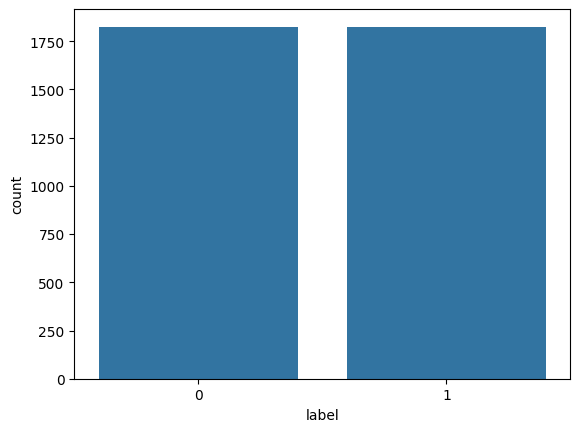

In [7]:
###let's explore the data 04

sns.countplot(x='label', data=data)
plt.show()

In [3]:
### We are trying to say that f(x) = y. 
###In other words, a combination of X features is going to determine a y class 

X = data.drop('label', axis=1)
y = data['label']
X.shape, y.shape

((3650, 59), (3650,))

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2920, 59), (730, 59), (2920,), (730,))

In [7]:
###decision trees

###1.instance the model
dt = DecisionTreeClassifier(random_state=42)

###2.fit the model
dt.fit(X_train,y_train)

###3.predict
dt_predictions = dt.predict(X_test)

###4.evaluate (actual x predicted)
dt_accuracy = accuracy_score(y_test,dt_predictions)
dt_cm = confusion_matrix(y_test, dt_predictions)

dt_accuracy, dt_cm

(0.6561643835616439,
 array([[225, 118],
        [133, 254]]))

In [8]:
###suport vector machines

###1.instance the model
svm = SVC(random_state=42, kernel='rbf')

###2.fit the model
svm.fit(X_train,y_train)

###3.predict
svm_predictions = svm.predict(X_test)

###4.evaluate (actual x predicted)
svm_accuracy = accuracy_score(y_test,svm_predictions)
svm_cm = confusion_matrix(y_test, dt_predictions)


svm_accuracy, svm_cm

(0.6753424657534246,
 array([[225, 118],
        [133, 254]]))

In [9]:
###random forest

###1.instance the model
rf = RandomForestClassifier(random_state=42)

###2.fit the model
rf.fit(X_train,y_train)

###3.predict
rf_predictions = rf.predict(X_test)

###4.evaluate (actual x predicted)
rf_accuracy = accuracy_score(y_test,rf_predictions)
rf_cm = confusion_matrix(y_test, dt_predictions)


rf_accuracy, rf_cm

(0.7698630136986301,
 array([[225, 118],
        [133, 254]]))

In [10]:
###logistic regression

###1.instance the model
lr = LogisticRegression(random_state=42)

###2.fit the model
lr.fit(X_train,y_train)

###3.predict
lr_predictions = lr.predict(X_test)

###4.evaluate (actual x predicted)
lr_accuracy = accuracy_score(y_test,lr_predictions)
lr_cm = confusion_matrix(y_test, dt_predictions)

lr_accuracy, lr_cm

(0.6493150684931507,
 array([[225, 118],
        [133, 254]]))

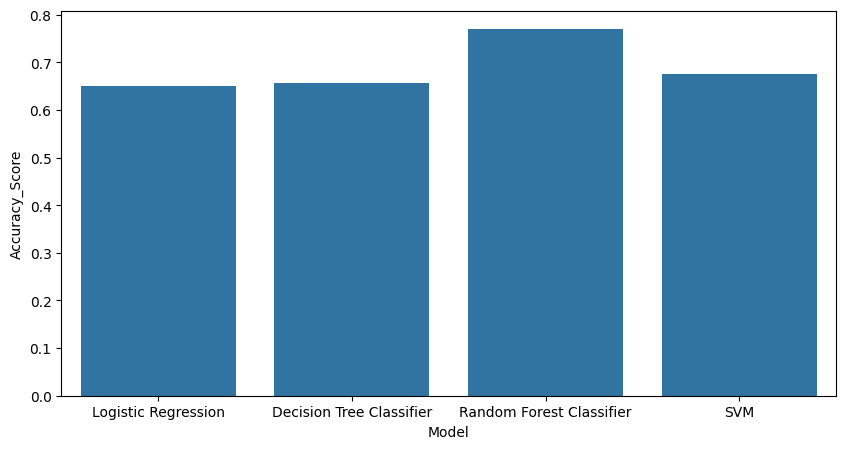

In [18]:
###evaluate all the accuracies together
models = pd.DataFrame({"Model":["Logistic Regression", "Decision Tree Classifier",
                               "Random Forest Classifier", "SVM"],
                       "Accuracy_Score":[lr_accuracy, dt_accuracy, rf_accuracy,
                                         svm_accuracy]})

plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Accuracy_Score", data=models)
plt.show()

In [19]:
###now, let's run shap to interpret the decision of the RF model
explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_test)

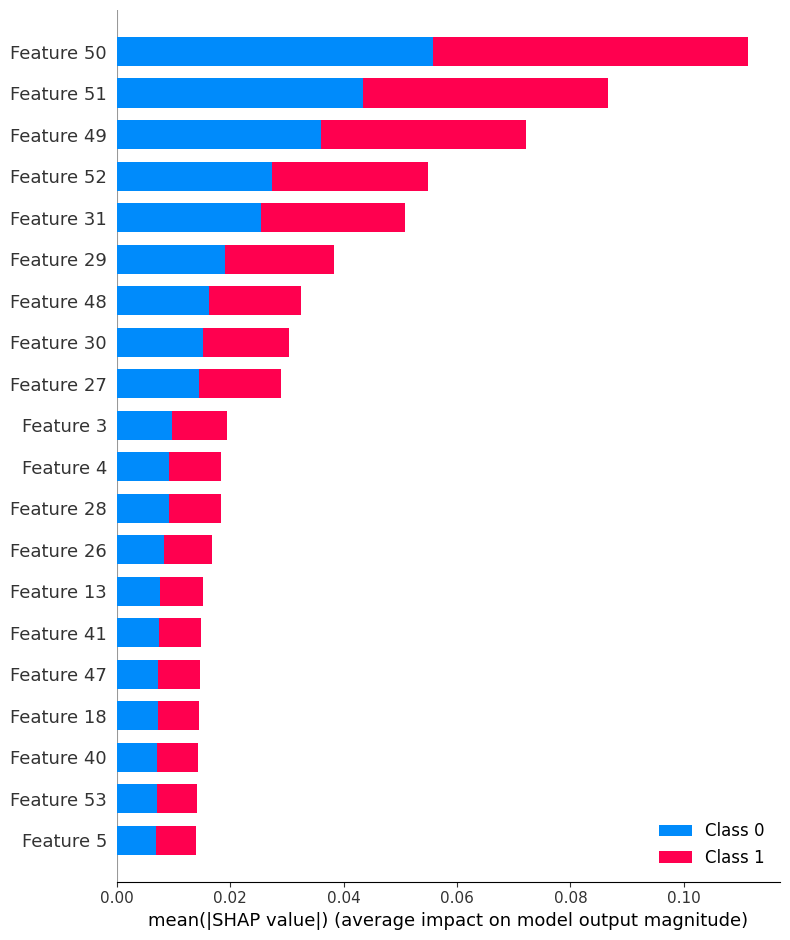

In [37]:
shap.summary_plot(shap_values, X_test)

In [38]:
for item in shap_values:
    print(item)

[[ 3.29584402e-03  5.03186485e-03  4.31886065e-03 ... -3.04759917e-04
   3.44219899e-04  1.70472742e-03]
 [ 2.94394522e-03  5.77550580e-03  2.88718105e-04 ... -4.15870098e-03
  -6.76742250e-03  3.05777358e-03]
 [ 3.21930302e-03  1.20298597e-03  1.18956290e-03 ... -2.48695922e-03
  -3.38094735e-03  3.63924305e-03]
 ...
 [-4.34070721e-04  5.07834552e-03 -1.54761622e-03 ... -2.33361666e-03
   5.07722935e-03 -3.23876034e-03]
 [ 3.82760938e-03 -1.66411701e-03 -2.82066563e-06 ... -7.68614260e-03
   9.84501411e-04  5.27629238e-03]
 [ 7.04582990e-04 -1.41910511e-03  4.05925220e-04 ...  1.81627816e-04
  -9.17366966e-04 -4.69658023e-03]]
[[-3.29584402e-03 -5.03186485e-03 -4.31886065e-03 ...  3.04759917e-04
  -3.44219899e-04 -1.70472742e-03]
 [-2.94394522e-03 -5.77550580e-03 -2.88718105e-04 ...  4.15870098e-03
   6.76742250e-03 -3.05777358e-03]
 [-3.21930302e-03 -1.20298597e-03 -1.18956290e-03 ...  2.48695922e-03
   3.38094735e-03 -3.63924305e-03]
 ...
 [ 4.34070721e-04 -5.07834552e-03  1.5476162

In [20]:
shap_values_class1 = shap_values[1]

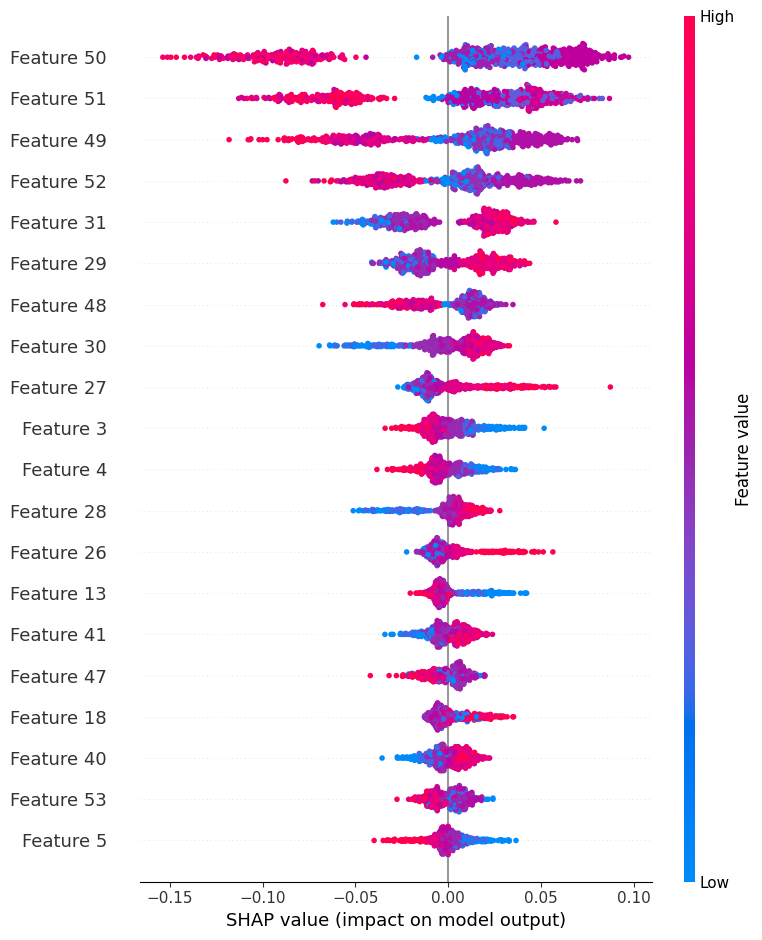

In [21]:
shap.summary_plot(shap_values_class1, X_test)
